In [47]:
  
# Import library yang dibutuhkan
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML


# Path ke file zip dan folder ekstraksi
zip_file_path = r"D:\archive.zip"
extracted_folder_path = r"D:\extracted_files"  # Ganti dengan path folder untuk menyimpan file yang diekstrak

# Pastikan folder tujuan ada sebelum mengekstrak
if not os.path.exists(extracted_folder_path):
    os.makedirs(extracted_folder_path)

# Ekstraksi file zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Daftar file yang diekstrak
extracted_files = os.listdir(extracted_folder_path)
print("Files extracted:", extracted_files)

# Membaca dataset
file_path = os.path.join(extracted_folder_path, 'heart_disease_uci.csv')  # Ganti nama file jika berbeda
df = pd.read_csv(file_path)










Files extracted: ['heart_disease_uci.csv']


In [22]:
# Fungsi untuk menampilkan 5 baris pertama, terakhir, dan nilai yang hilang dari sebuah DataFrame
def display_head_tail_and_missing(csv_path):
    # Membaca file CSV ke dalam DataFrame
    df = pd.read_csv(csv_path)
    
    # Mengatur tampilan agar seluruh kolom ditampilkan secara horizontal
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    
    # Menampilkan 5 baris pertama
    print("5 Baris Pertama:")
    display(HTML(tabulate(df.head(), headers='keys', tablefmt='html', showindex=True)))
    
    # Menampilkan 5 baris terakhir
    print("\n5 Baris Terakhir:")
    display(HTML(tabulate(df.tail(), headers='keys', tablefmt='html', showindex=True)))
    
    # Menampilkan nilai yang hilang
    print("\nNilai yang Hilang:")
    missing_values = df.isnull().sum()
    print(tabulate(missing_values.reset_index(), headers=['Kolom', 'Jumlah Nilai Hilang'], tablefmt='grid', showindex=False))

# Path ke file CSV
csv_path = r'D:\archive\heart_disease_uci.csv'

# Memanggil fungsi untuk menampilkan data
display_head_tail_and_missing(csv_path)

5 Baris Pertama:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160,286,False,lv hypertrophy,108,True,1.5,flat,3,normal,2
2,3,67,Male,Cleveland,asymptomatic,120,229,False,lv hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,5,41,Female,Cleveland,atypical angina,130,204,False,lv hypertrophy,172,False,1.4,upsloping,0,normal,0



5 Baris Terakhir:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127,333,True,st-t abnormality,154,0,0,nan,nan,nan,1
916,917,62,Male,VA Long Beach,typical angina,nan,139,False,st-t abnormality,nan,nan,nan,nan,nan,nan,0
917,918,55,Male,VA Long Beach,asymptomatic,122,223,True,st-t abnormality,100,0,0,nan,nan,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,nan,385,True,lv hypertrophy,nan,nan,nan,nan,nan,nan,0
919,920,62,Male,VA Long Beach,atypical angina,120,254,False,lv hypertrophy,93,1,0,nan,nan,nan,1



Nilai yang Hilang:
+----------+-----------------------+
| Kolom    |   Jumlah Nilai Hilang |
+==========+=======================+
| id       |                     0 |
+----------+-----------------------+
| age      |                     0 |
+----------+-----------------------+
| sex      |                     0 |
+----------+-----------------------+
| dataset  |                     0 |
+----------+-----------------------+
| cp       |                     0 |
+----------+-----------------------+
| trestbps |                    59 |
+----------+-----------------------+
| chol     |                    30 |
+----------+-----------------------+
| fbs      |                    90 |
+----------+-----------------------+
| restecg  |                     2 |
+----------+-----------------------+
| thalch   |                    55 |
+----------+-----------------------+
| exang    |                    55 |
+----------+-----------------------+
| oldpeak  |                    62 |
+----------+------

In [38]:
# Menghitung deskripsi statistik untuk kolom numerik
numerical_stats = df.describe()
# Mengonversi deskripsi statistik ke format HTML
stats_html = tabulate(numerical_stats, headers='keys', tablefmt='html', showindex=True)
# Menampilkan hasil
print("\nDescriptive Statistics:\n")
display(HTML(stats_html))

# Mendapatkan daftar kolom numerik
numerical_columns = df.select_dtypes(include=np.number).columns

# Menghitung dan menampilkan statistik deskriptif untuk setiap kolom numerik
for col in numerical_columns:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'  # Mode bisa kosong jika tidak ada mode
    std_dev_val = df[col].std()
    variance_val = df[col].var()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurt()

    # Menampilkan hasil statistik
    print(f"\nStatistik untuk kolom '{col}':")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")
    print(f"Standar Deviasi: {std_dev_val}")
    print(f"Variansi: {variance_val}")
    print(f"Skewness: {skewness_val}")
    print(f"Kurtosis: {kurtosis_val}")




Descriptive Statistics:



,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920,920,861,890,865,858,309,920
mean,460.5,53.5109,132.132,199.13,137.546,0.878788,0.676375,0.995652
std,265.725,9.42469,19.0661,110.781,25.9263,1.09123,0.935653,1.14269
min,1,28,0,0,60,-2.6,0,0
25%,230.75,47,120,175,120,0,0,0
50%,460.5,54,130,223,140,0.5,0,1
75%,690.25,60,140,268,157,1.5,1,2
max,920,77,200,603,202,6.2,3,4



Statistik untuk kolom 'id':
Mean: 460.5
Median: 460.5
Mode: 1
Standar Deviasi: 265.72542219366215
Variansi: 70610.0
Skewness: 0.0
Kurtosis: -1.2

Statistik untuk kolom 'age':
Mean: 53.51086956521739
Median: 54.0
Mode: 54
Standar Deviasi: 9.424685209576857
Variansi: 88.82469129961679
Skewness: -0.195993861608106
Kurtosis: -0.3829298182845311

Statistik untuk kolom 'trestbps':
Mean: 132.13240418118468
Median: 130.0
Mode: 120.0
Standar Deviasi: 19.066069518587476
Variansi: 363.5150068876104
Skewness: 0.21333446967212508
Kurtosis: 2.958664416580538

Statistik untuk kolom 'chol':
Mean: 199.13033707865168
Median: 223.0
Mode: 0.0
Standar Deviasi: 110.7808103532305
Variansi: 12272.387942518422
Skewness: -0.6138360897370758
Kurtosis: 0.0622726880184552

Statistik untuk kolom 'thalch':
Mean: 137.5456647398844
Median: 140.0
Mode: 150.0
Standar Deviasi: 25.926276492797594
Variansi: 672.1718127809892
Skewness: -0.21111858073161133
Kurtosis: -0.47972463236840435

Statistik untuk kolom 'oldpeak':
Me

In [37]:
# Menghitung statistik deskriptif
numerical_stats = df.describe()  

# Mengonversi statistik deskriptif ke format HTML
stats_html = tabulate(numerical_stats, headers='keys', tablefmt='html', showindex=True)

# Menampilkan hasil
print("\nStatistik Deskriptif:\n")
display(HTML(stats_html))


Statistik Deskriptif:



,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920,920,861,890,865,858,309,920
mean,460.5,53.5109,132.132,199.13,137.546,0.878788,0.676375,0.995652
std,265.725,9.42469,19.0661,110.781,25.9263,1.09123,0.935653,1.14269
min,1,28,0,0,60,-2.6,0,0
25%,230.75,47,120,175,120,0,0,0
50%,460.5,54,130,223,140,0.5,0,1
75%,690.25,60,140,268,157,1.5,1,2
max,920,77,200,603,202,6.2,3,4


In [36]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = df.corr(numeric_only=True)

# Menampilkan matriks korelasi dalam format HTML
correlation_html = tabulate(correlation_matrix, headers='keys', tablefmt='html', showindex=True)

# Menampilkan hasil
print("\nMatriks Korelasi:\n")
display(HTML(correlation_html))


Matriks Korelasi:



,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1,0.239301,0.0529237,-0.376936,-0.466427,0.0499302,0.0614335,0.273552
age,0.239301,1,0.244253,-0.0862344,-0.365778,0.258243,0.370416,0.339596
trestbps,0.0529237,0.244253,1,0.0928532,-0.104899,0.161908,0.0937045,0.122291
chol,-0.376936,-0.0862344,0.0928532,1,0.236121,0.0477341,0.0516059,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1,-0.151174,-0.264094,-0.366265
oldpeak,0.0499302,0.258243,0.161908,0.0477341,-0.151174,1,0.281817,0.443084
ca,0.0614335,0.370416,0.0937045,0.0516059,-0.264094,0.281817,1,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1


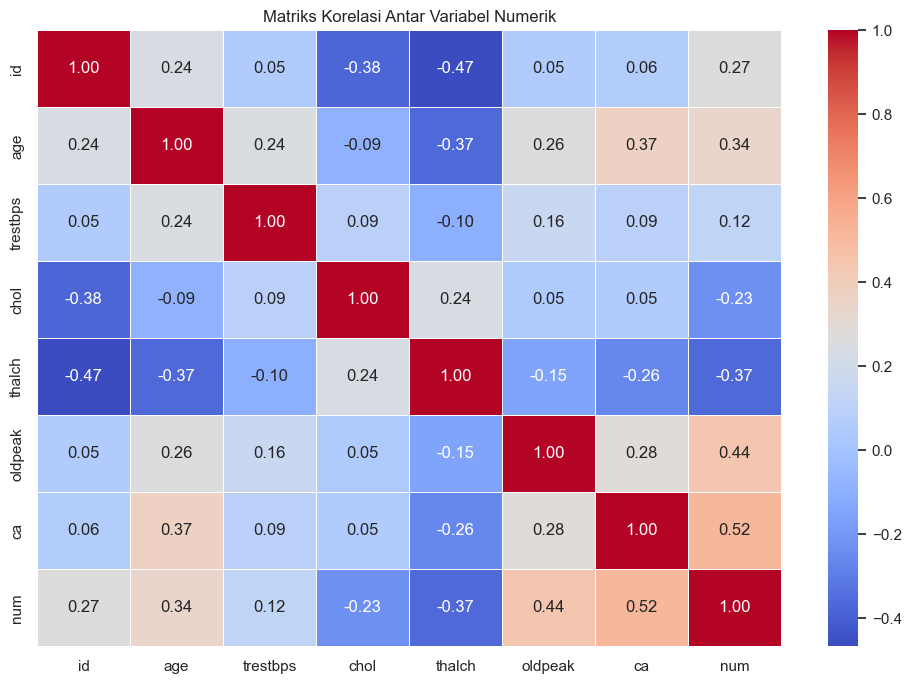

In [43]:
# Visualisasi heatmap untuk korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

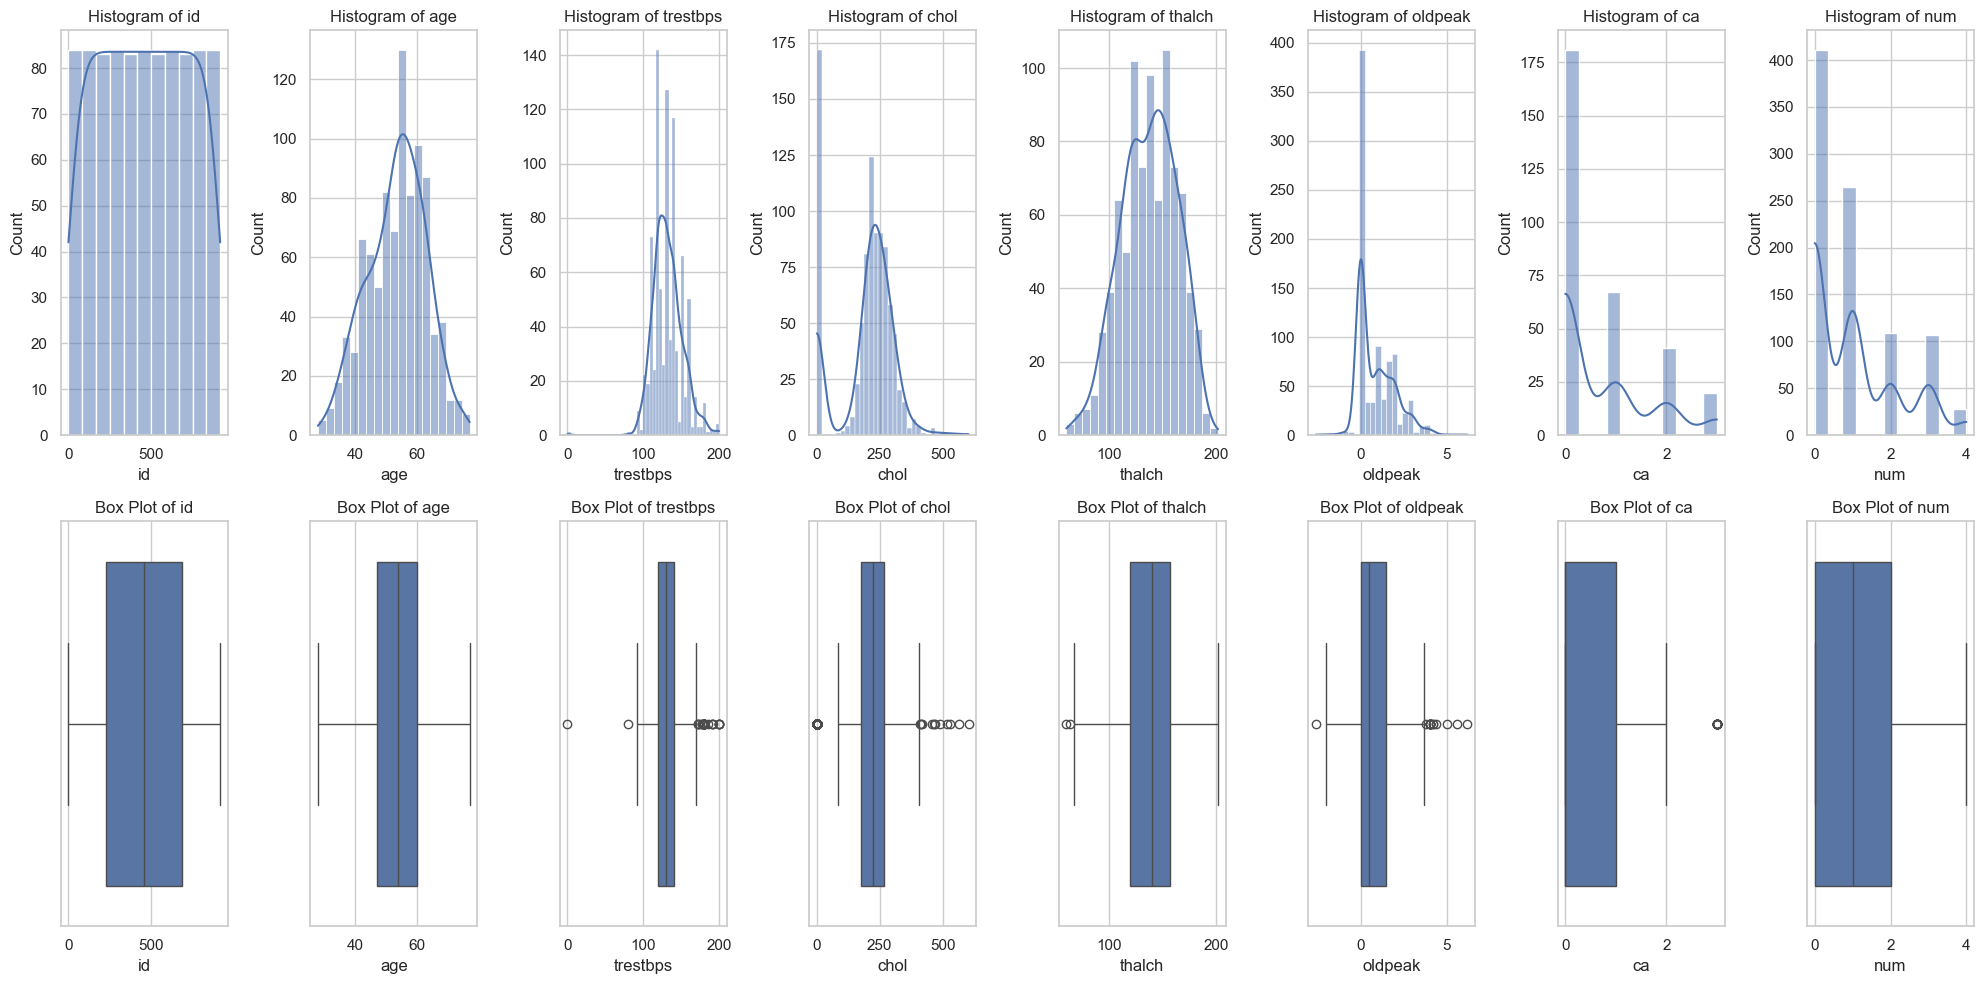

In [40]:
# Visualisasi histogram dan box plot untuk setiap variabel numerik
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns), i + 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(2, len(numerical_columns), i + 1 + len(numerical_columns))
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


High correlation pairs: [('ca', 'num'), ('num', 'ca')]


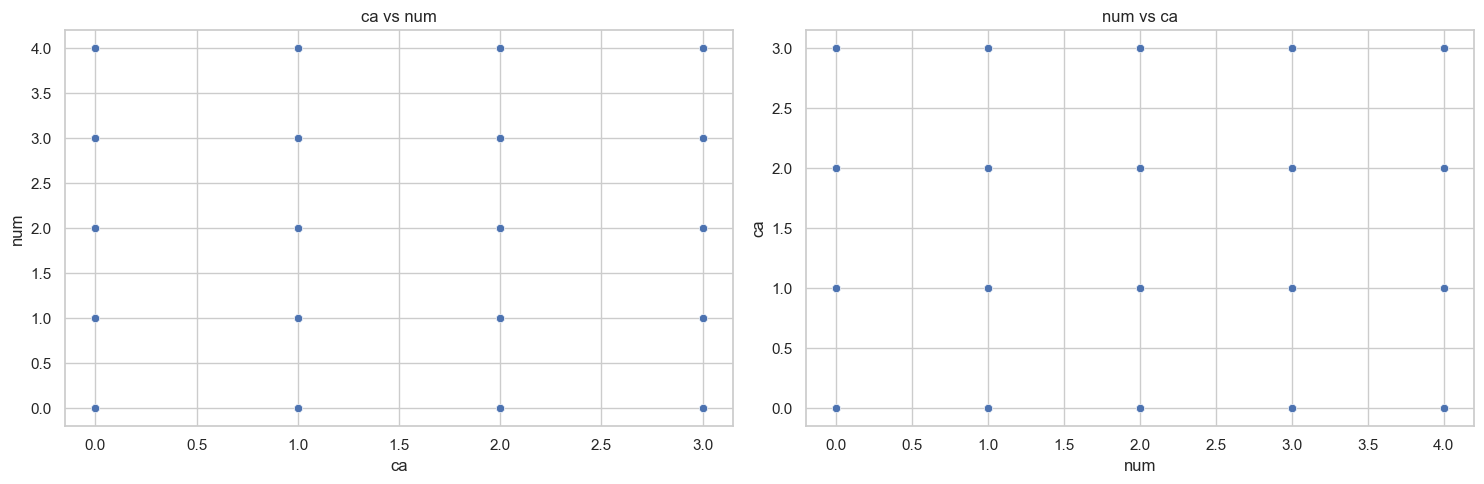

In [42]:
# Scatter plot untuk pasangan variabel yang memiliki korelasi tinggi
high_corr_pairs = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1)].stack().index.tolist()
print("\nHigh correlation pairs:", high_corr_pairs)

if len(high_corr_pairs) > 0:
    plt.figure(figsize=(15, 5))
    for i, (col1, col2) in enumerate(high_corr_pairs):
        plt.subplot(1, len(high_corr_pairs), i + 1)
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'{col1} vs {col2}')
    plt.tight_layout()
    plt.show()
else:
    print("\nTidak ada pasangan variabel dengan korelasi tinggi.")
    